<h3><center><bold>Logistic Regression</bold></center></h3>

An algorithm of supervised learning, also classification. Uses a sigmoid shape graph to make predictions,
and according to a defined threshold, it can be a labeled as a finite value (1 or 0)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Sigmoid function follows this formula: </br>
<img src="Images/sigmoidFormula.png">

X in this case will be substituted by the linear formula as used in Linear Regression:
<h3><center>Y = <span style="text-decoration: overline;">w</span> &middot; <span style="text-decoration: overline;">X</span> + b</center></h3>
where:
<ul>
<li>w: weight</li> 
<li>b: bias<br></li>
<li>X: dataset</li>
</ul>

In [105]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self.X_mean = None
        self.X_std = None

In [107]:
    def normalize(self, X):
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        return (X - self.X_mean) / self.X_std

    def denormalize_weights(self, w_norm, b_norm):
        w_denorm = w_norm / self.X_std
        b_denorm = b_norm - np.sum(w_denorm * self.X_mean)
        return w_denorm, b_denorm

In [109]:
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

Cost function of logistic function vectorized and then non vectorized:
Formula: <br>
<img src="Images/costFunction.png">

In [112]:
    def cost_function(self, features, labels, w, b):
        m, _ = features.shape
        z = np.dot(features, w) + b
        fwb = self.sigmoid(z)
        #avoiding log(o)
        epsilon = 1e-15
        cost = -np.mean(labels * np.log(fwb + epsilon) + (1 - labels) * np.log(1 - fwb + epsilon))
        
        return cost

In [114]:
    def cost_functionNV(self, features, labels, w, b):
        m , _ = features.shape
        cost = 0
        epsilon = 1e-15
        z = np.dot(features, w) + b
        for i in range(m):
            fwb = self.sigmoid(z[i])
            cost += (labels[i]*np.log(fwb + epsilon)+(1-labels[i])*np.log(1-fwb + epsilon))
        return -(cost/m)

Gradient Descent formula as shows below: <br>
<img src="Images/GSLogistic.png" >

In [117]:
    def gradient_descent(self, features, labels, alpha, attempts, lambda_):
        m, n = features.shape
        w = np.zeros(n)
        b = 0
        J_history = []
        w_history = []

        for _ in range(attempts):
            z = np.dot(features, w) + b
            fwb = self.sigmoid(z) - labels

            dj_dw = (np.dot(features.T, loss) / m) + (lambda_ / m) * w
            dj_db = np.mean(loss)

            w = w - alpha * dj_dw
            b = b - alpha * dj_db

            if i < 100000:
                cost = self.cost_function(features, labels, w, b)
                J_history.append(cost)
                if i % math.ceil(attempts / 10) == 0 or i == (attempts - 1):
                    w_history.append(w)
                    print(f"Iteration {i:4}: Cost {float(cost):8.2f}")

        return w, b, J_history, w_history

In [119]:
    def fit(self, features, labels, alpha=0.01, attempts=10000, lambda_=0):
            normalized_features = self.normalize(features)
            w_norm, b_norm, J_history, w_history = self.gradient_descent(normalized_features, labels, alpha, attempts, lambda_)
            
            self.w, self.b = self.denormalize_weights(w_norm, b_norm)
            
            return self.w, self.b, J_history, w_history

In [121]:
    def predict(self, predict_values, threshold = 0.5):
            # Ensure predict_values is 2D
            if predict_values.ndim == 1:
                predict_values = predict_values.reshape(1, -1)
            
            m, n = predict_values.shape
            probabilities = np.zeros(m)
            predictions = np.zeros(m)
            for i in range(m):
                f_wb = self.sigmoid(np.dot(self.w, predict_values[i]) + self.b)
                probabilities[i] = f_wb
                predictions[i] = 1 if f_wb >= threshold else 0
            return predictions, probabilities

In [123]:
class LogisticRegression:
    def __init__(self):
        self.w = None
        self.b = None
        self.X_mean = None
        self.X_std = None

    def normalize(self, X):
        self.X_mean = np.mean(X, axis=0)
        self.X_std = np.std(X, axis=0)
        return (X - self.X_mean) / self.X_std

    def denormalize_weights(self, w_norm, b_norm):
        w_denorm = w_norm / self.X_std
        b_denorm = b_norm - np.sum(w_denorm * self.X_mean)
        return w_denorm, b_denorm

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, features, labels, w, b):
        m, _ = features.shape
        z = np.dot(features, w) + b
        fwb = self.sigmoid(z)
        #avoiding log(o)
        epsilon = 1e-15
        cost = -np.mean(labels * np.log(fwb + epsilon) + (1 - labels) * np.log(1 - fwb + epsilon))
        
        return cost

    def gradient_descent(self, features, labels, alpha, attempts, lambda_):
        m, n = features.shape
        w = np.zeros(n)
        b = 0
        J_history = []
        w_history = []

        for i in range(attempts):
            z = np.dot(features, w) + b
            f_wb = self.sigmoid(z)
            loss = f_wb - labels

            dj_dw = (np.dot(features.T, loss) / m) + (lambda_ / m) * w
            dj_db = np.mean(loss)

            w = w - alpha * dj_dw
            b = b - alpha * dj_db

            if i < 100000:
                cost = self.cost_function(features, labels, w, b)
                J_history.append(cost)
                if i % math.ceil(attempts / 10) == 0 or i == (attempts - 1):
                    w_history.append(w)
                    print(f"Iteration {i:4}: Cost {float(cost):8.2f}")

        return w, b, J_history, w_history

    def fit(self, features, labels, alpha=0.01, attempts=10000, lambda_=0):
        normalized_features = self.normalize(features)
        w_norm, b_norm, J_history, w_history = self.gradient_descent(normalized_features, labels, alpha, attempts, lambda_)
        
        self.w, self.b = self.denormalize_weights(w_norm, b_norm)
        
        return self.w, self.b, J_history, w_history

    def predict(self, predict_values, threshold = 0.5):
            # Ensure predict_values is 2D
            if predict_values.ndim == 1:
                predict_values = predict_values.reshape(1, -1)
            
            m, n = predict_values.shape
            probabilities = np.zeros(m)
            predictions = np.zeros(m)
            for i in range(m):
                f_wb = self.sigmoid(np.dot(self.w, predict_values[i]) + self.b)
                probabilities[i] = f_wb
                predictions[i] = 1 if f_wb >= threshold else 0
            return predictions, probabilities

Iteration    0: Cost     0.69
Iteration 1000: Cost     0.48
Iteration 2000: Cost     0.47
Iteration 3000: Cost     0.47
Iteration 4000: Cost     0.47
Iteration 5000: Cost     0.47
Iteration 6000: Cost     0.47
Iteration 7000: Cost     0.47
Iteration 8000: Cost     0.47
Iteration 9000: Cost     0.47
Iteration 9999: Cost     0.47
Final w: [ 1.21263189e-01  3.46311849e-02 -1.29624335e-02  5.51108427e-04
 -1.13254278e-03  8.83706816e-02  9.32456754e-01  1.50431218e-02]
Final b: -8.31204279
Prediction: 1.0
Probability of class 1: 0.8251
Probability of class 0: 0.1749


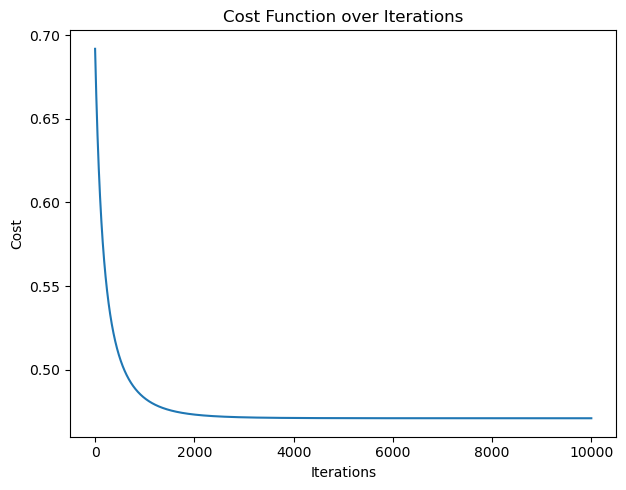

In [125]:
if __name__ == "__main__":
    url = "/Users/regiloshi/Downloads/diabetes2.csv"
    try:
        housing = pd.read_csv(url)
        X = housing.drop(columns=['Outcome']).values
        Y = housing['Outcome'].values
    except Exception as e:
        print(f"Error loading data: {e}")
        exit()

    model = LogisticRegression()
    w_final, b_final, J_hist, p_hist = model.fit(X, Y, alpha=0.01, attempts=10000, lambda_=1)
    
    print(f"Final w: {model.w}")
    print(f"Final b: {model.b:.8f}")


    test_X = np.array([[8, 176, 90, 34, 300, 33.7, 0.467, 58]])
    prediction, probability = model.predict(test_X)
    
    print(f"Prediction: {prediction[0]}")
    print(f"Probability of class 1: {probability[0]:.4f}")
    print(f"Probability of class 0: {1 - probability[0]:.4f}")

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(J_hist)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.tight_layout()
    plt.show()